####  this notebook is for step 2 of tasks: Get the data in a form something like (longitude, latitude, time, fire/land/water/burned area/no data, FRP, confidence, source).  ml_tign should be doing something like that. We may add more such as pixel size or pixel ellipse later. Determine from literature the possible values delivered by the satellite products we use and check them out in real data. Make some pictures, keep good notes (git is best), store pictures


# MODIS data

# MODIS Fire Data Features

This notebook provides an overview of the key features found in MODIS fire detection datasets, with detailed explanations of each feature and its significance.
https://modis-fire.umd.edu/files/MODIS_C6_Fire_User_Guide_C.pdf#page=8.23

## 1. Longitude and Latitude
- **Description**: These represent the geographical position of each detected fire pixel.
- **Format**: Degrees (°)
- **Range**:
  - Longitude: -180° to +180°
  - Latitude: -90° to +90°
  
## 2. Time
- **Description**: The time when each fire pixel was detected by the satellite.
- **Format**: UTC (Coordinated Universal Time)
- **Use**: Helps to timestamp fire occurrences for further temporal analysis.

## 3. Fire Mask (Fire/Land/Water/Burned Area/No Data)
- **Description**: The fire mask assigns pixels into different categories based on their type (fire, land, water, etc.).
- **Categories**:
  - `0`: Not processed (missing data)
  - `1`: Not processed (obsolete, not used since Collection 1)
  - `2`: Not processed (other reasons)
  - `3`: Water (non-fire pixel)
  - `4`: Cloud-covered (land or water)
  - `5`: Non-fire land pixel
  - `6`: Unknown (land or water)
  - `7`: Fire (low confidence, land or water)
  - `8`: Fire (nominal confidence, land or water)
  - `9`: Fire (high confidence, land or water)
  
## 4. Fire Radiative Power (FRP)
- **Description**: The amount of energy released by the fire, measured in megawatts (MW). FRP is useful for estimating fire intensity.
- **Range**: Typically ranges from 0 MW to several thousand MW for large fires.
- **Use**: FRP is an important metric for understanding fire behavior and estimating emissions.

## 5. Confidence
- **Description**: The confidence level indicates the reliability of the fire detection for each pixel.
- **Categories**:
  - Low confidence (7)
  - Nominal confidence (8)
  - High confidence (9)
- **Use**: Confidence helps users filter detections based on their tolerance for false positives or negatives. Higher confidence values indicate more reliable fire detections.

## 6. Source
- **Description**: The source of the MODIS data, which refers to the satellite that provided the observation.
- **Options**:
  - **Terra (MOD14)**
  - **Aqua (MYD14)**
- **Use**: The source satellite helps track which observations came from Terra or Aqua.


![How are the confidence values in the “FP confidence” SDS related to the confidence
classes assigned to fire pixels?](fire_confidence.jpg)

---

This document provides a brief explanation of each feature. As we proceed with the analysis, we'll use this information to process and visualize the fire detection data.


In [5]:
!pip install pyhdf

  Obtaining dependency information for pyhdf from https://files.pythonhosted.org/packages/33/6a/bbfb5b6a143b130e56e46ec95bcba94dce3c628e389051ff704d29bac6a6/pyhdf-0.11.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.5/771.5 kB 38.7 MB/s eta 0:00:00
DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from pyhdf.SD import SD, SDC
import matplotlib.pyplot as plt
import numpy as np
# Open the HDF5 file
file = SD('MOD14.A2018312.1950.061.2021344091856.hdf', SDC.READ)

# List all datasets in the file
datasets = file.datasets()
datasets


{'fire mask': (('number_of_scan_lines', 'pixels_per_scan_line'),
  (2030, 1354),
  21,
  0),
 'algorithm QA': (('number_of_scan_lines', 'pixels_per_scan_line'),
  (2030, 1354),
  25,
  1),
 'FP_line': (('number_of_active_fires',), (53,), 22, 2),
 'FP_sample': (('number_of_active_fires',), (53,), 22, 3),
 'FP_latitude': (('number_of_active_fires',), (53,), 5, 4),
 'FP_longitude': (('number_of_active_fires',), (53,), 5, 5),
 'FP_R2': (('number_of_active_fires',), (53,), 5, 6),
 'FP_T21': (('number_of_active_fires',), (53,), 5, 7),
 'FP_T31': (('number_of_active_fires',), (53,), 5, 8),
 'FP_MeanT21': (('number_of_active_fires',), (53,), 5, 9),
 'FP_MeanT31': (('number_of_active_fires',), (53,), 5, 10),
 'FP_MeanDT': (('number_of_active_fires',), (53,), 5, 11),
 'FP_MAD_T21': (('number_of_active_fires',), (53,), 5, 12),
 'FP_MAD_T31': (('number_of_active_fires',), (53,), 5, 13),
 'FP_MAD_DT': (('number_of_active_fires',), (53,), 5, 14),
 'FP_power': (('number_of_active_fires',), (53,), 5, 

 Access Metadata

In [5]:
# File path to the MODIS HDF file
mod14_file = 'MOD14.A2018312.1950.061.2021344091856.hdf'

# Open the HDF file for reading
hdf_file = SD(mod14_file, SDC.READ)

# Retrieve global attributes (metadata) from the HDF file
global_attrs = hdf_file.attributes()

# Print metadata information
print("Global Metadata in the HDF file:")
for key, value in global_attrs.items():
    print(f"{key}: {value}")

# Close the HDF file
hdf_file.end()

Global Metadata in the HDF file:
FirePix: 53
LandFirePix: 53
WaterFirePix: 0
MissingPix: 0
LandPix: 201994
WaterPix: 2538848
CoastPix: 7778
WaterAdjacentFirePix: 13
CloudAdjacentFirePix: 3
UnknownLandPix: 0
UnknownWaterPix: 9482
LandCloudPix: 8394
WaterCloudPix: 1026055
GlintPix: 0
GlintRejectedPix: 0
CoastRejectedLandPix: 4
HotSurfRejectedPix: 0
ClearingRejectedPix: 0
CoastRejectedWaterPix: 0
DayPix: 2748620
NightPix: 0
MissingRadPix: 0
MissingGeoPix: 0
Satellite: Terra
ProcessVersionNumber: 6.2.3
MOD021KM input file: /MODAPSops7/archive/f7477/running/AM1M_C61_L1mc/14229088/MOD021KM.A2018312.1950.061.2018313074449.hdf
MOD03 input file: /MODAPSops7/archive/f7477/running/AM1M_C61_L1mc/14229088/MOD03.A2018312.1950.061.2018313011438.hdf
SystemID: Linux minion7477 3.10.0-1160.42.2.el7.x86_64 #1 SMP Tue Sep 7 14:49:57 UTC 2021 x86_64
identifier_product_doi: 10.5067/MODIS/MOD14.061
identifier_product_doi_authority: http://dx.doi.org
CoreMetadata.0: 
GROUP                  = INVENTORYMETADATA

In [48]:
from pyhdf.SD import SD, SDC
import numpy as np

# File path to the MODIS HDF file
mod14_file = 'MOD14.A2018312.1950.061.2021344091856.hdf'

# Open the HDF file for reading
hdf_file = SD(mod14_file, SDC.READ)

# Find the index of the "fire mask" SDS
fire_mask_sds = hdf_file.select('fire mask')

# Read the entire "fire mask" dataset
fire_mask_data = fire_mask_sds.get()

# Print the shape of the fire mask data and an example of its content
print(f"Fire Mask Data Shape: {fire_mask_data.shape}")
print(f"Fire Mask Data (Sample): \n{fire_mask_data[:10, :10]}")

# Closing the HDF file
hdf_file.end()


Fire Mask Data Shape: (2030, 1354)
Fire Mask Data (Sample): 
[[4 4 4 3 4 3 3 3 3 3]
 [4 4 4 4 4 3 3 3 3 3]
 [3 4 4 4 4 4 4 3 4 3]
 [3 3 3 3 3 3 3 3 4 3]
 [4 4 3 3 3 3 3 3 3 3]
 [4 4 3 3 3 4 3 3 3 3]
 [4 3 3 3 3 3 3 3 3 3]
 [4 3 3 3 4 3 3 3 3 3]
 [4 3 3 3 3 4 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]


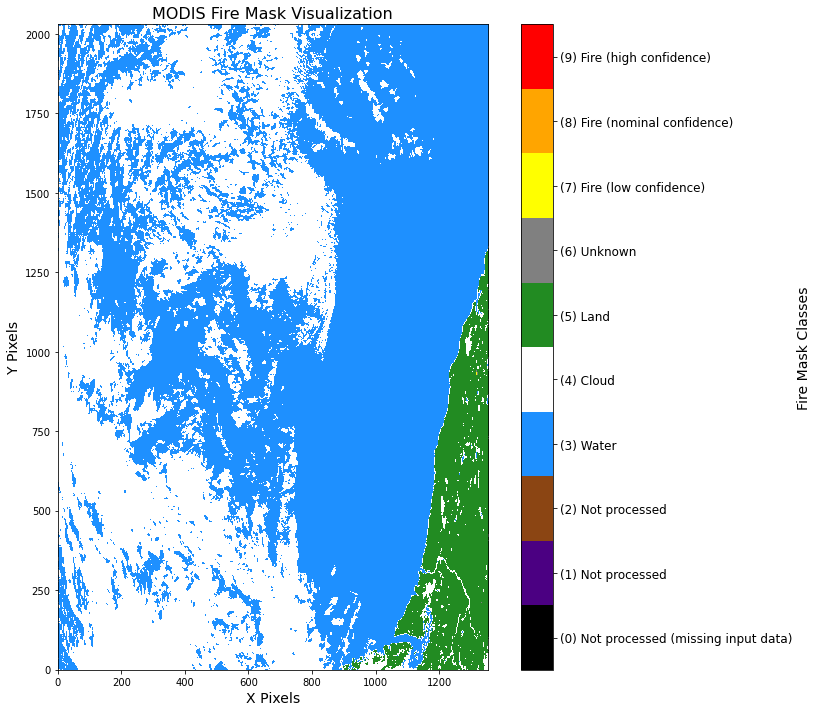

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from pyhdf.SD import SD, SDC

# Define class names with numbers
class_names = {
    0: '(0) Not processed (missing input data)',
    1: '(1) Not processed',
    2: '(2) Not processed',
    3: '(3) Water',
    4: '(4) Cloud',
    5: '(5) Land ',
    6: '(6) Unknown',
    7: '(7) Fire (low confidence)',
    8: '(8) Fire (nominal confidence)',
    9: '(9) Fire (high confidence)'
}

# Define distinct colors for each class
distinct_colors = [
    '#000000',  # Black for not processed (missing input data)
    '#4B0082',  # Indigo for not processed
    '#8B4513',  # SaddleBrown for not processed
    '#1E90FF',  # DodgerBlue for non-fire water pixel
    '#FFFFFF',  # White for cloud
    '#228B22',  # ForestGreen for non-fire land pixel
    '#808080',  # Gray for unknown
    '#FFFF00',  # Yellow for fire (low confidence)
    '#FFA500',  # Orange for fire (nominal confidence)
    '#FF0000'   # Red for fire (high confidence)
]

# File path to the MODIS HDF file
mod14_file = 'MOD14.A2018312.1950.061.2021344091856.hdf'

# Open the HDF file for reading
hdf_file = SD(mod14_file, SDC.READ)

# Find the index of the "fire mask" SDS
fire_mask_sds = hdf_file.select('fire mask')

# Read the entire "fire mask" dataset
fire_mask_data = fire_mask_sds.get()

# Closing the HDF file
hdf_file.end()

# Create a custom colormap
cmap = ListedColormap(distinct_colors)

# Create norm to map values to colors
bounds = np.arange(11) - 0.5
norm = BoundaryNorm(bounds, cmap.N)

# Increase figure size to accommodate larger legend
plt.figure(figsize=(12, 10))

# Plotting the Fire Mask Data with (0, 0) at the bottom-left corner
img = plt.imshow(fire_mask_data, cmap=cmap, norm=norm, origin='lower')

# Add colorbar with larger font size
cbar = plt.colorbar(img, label='Fire Mask Classes', ticks=range(10))
cbar.set_ticklabels([class_names[i] for i in range(10)])
cbar.ax.tick_params(labelsize=12)  # Increase label size
cbar.set_label('Fire Mask Classes', size=14)  # Increase colorbar title size

plt.title('MODIS Fire Mask Visualization', fontsize=16)
plt.xlabel('X Pixels', fontsize=14)
plt.ylabel('Y Pixels', fontsize=14)

# Adjust layout to prevent cutting off colorbar labels
plt.tight_layout()

plt.show()

Find and Print Indices with Fire Mask Values of 8 and 9:

In [52]:
# File path to the MODIS HDF file
mod14_file = 'MOD14.A2018312.1950.061.2021344091856.hdf'

# Open the HDF file for reading
hdf_file = SD(mod14_file, SDC.READ)
# Find the index of the "fire mask" SDS
fire_mask_sds = hdf_file.select('fire mask')

# Read the entire "fire mask" dataset
fire_mask_data = fire_mask_sds.get()

# Closing the HDF file
hdf_file.end()

# Find indices where fire mask equals 8 or 9
fire_8_indices = np.where(fire_mask_data == 8)  # Nominal confidence fire
fire_9_indices = np.where(fire_mask_data == 9)  # High confidence fire

# Combine and print the results
print("Indices of Nominal Confidence Fire (8):")
print(list(zip(fire_8_indices[0], fire_8_indices[1])))

print("\nIndices of High Confidence Fire (9):")
print(list(zip(fire_9_indices[0], fire_9_indices[1])))

# Optional: Count of detections
print(f"\nTotal Nominal Confidence Fire Detections (8): {len(fire_8_indices[0])}")
print(f"Total High Confidence Fire Detections (9): {len(fire_9_indices[0])}")

Indices of Nominal Confidence Fire (8):
[(12, 1064), (118, 1241), (207, 1329), (211, 1330), (212, 1330), (486, 1181), (506, 1269), (510, 1269), (510, 1270), (641, 1183), (790, 1331), (925, 1316), (926, 1316), (927, 1315), (929, 1312), (930, 1315), (930, 1316), (931, 1314), (932, 1313), (933, 1317), (935, 1314), (937, 1315), (940, 1316)]

Indices of High Confidence Fire (9):
[(207, 1330), (785, 1331), (926, 1315), (928, 1313), (928, 1314), (928, 1315), (928, 1316), (929, 1313), (929, 1314), (929, 1316), (931, 1315), (932, 1314), (932, 1315), (932, 1316), (933, 1313), (933, 1314), (933, 1315), (933, 1316), (934, 1313), (934, 1316), (935, 1315), (935, 1316), (936, 1314), (936, 1315), (940, 1314), (940, 1315), (941, 1314), (941, 1315)]

Total Nominal Confidence Fire Detections (8): 23
Total High Confidence Fire Detections (9): 28


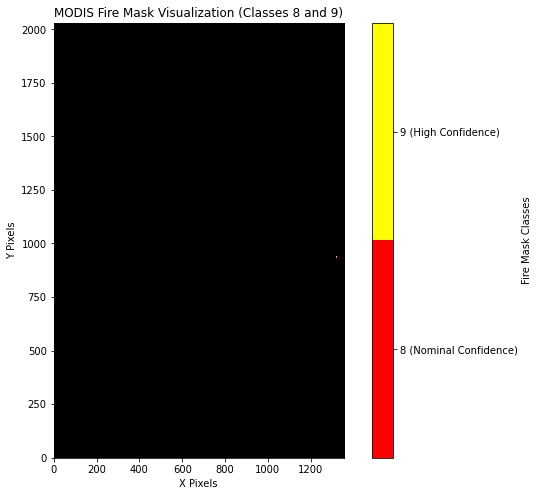

In [6]:
from matplotlib import colors
# File path to the MODIS HDF file
mod14_file = 'MOD14.A2018312.1950.061.2021344091856.hdf'

# Open the HDF file for reading
hdf_file = SD(mod14_file, SDC.READ)



# Find the index of the "fire mask" SDS
fire_mask_sds = hdf_file.select('fire mask')

# Read the entire "fire mask" dataset
fire_mask_data = fire_mask_sds.get()

# Closing the HDF file
hdf_file.end()

# Create separate masks for class 8 and 9
fire_8_mask = fire_mask_data == 8
fire_9_mask = fire_mask_data == 9

# Plotting the Fire Mask Data (Only classes 8 and 9)
plt.figure(figsize=(10, 8))

# Create a base image (all black)
base_image = np.zeros(fire_mask_data.shape + (3,))

# Set red color for class 8 (nominal confidence)
base_image[fire_8_mask] = [1, 0, 0]  # Red

# Set yellow color for class 9 (high confidence)
base_image[fire_9_mask] = [1, 1, 0]  # Yellow

# Plot the image
plt.imshow(base_image, origin='lower', interpolation='none')

# Create a custom colormap for the legend
cmap = colors.ListedColormap(['red', 'yellow'])
bounds = [8, 9, 10]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This line is necessary for the colorbar to work correctly
cbar = plt.colorbar(sm, ticks=[8.5, 9.5], label='Fire Mask Classes')
cbar.set_ticklabels(['8 (Nominal Confidence)', '9 (High Confidence)'])

# Adding labels and title
plt.title('MODIS Fire Mask Visualization (Classes 8 and 9)')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

# Show the plot
plt.show()

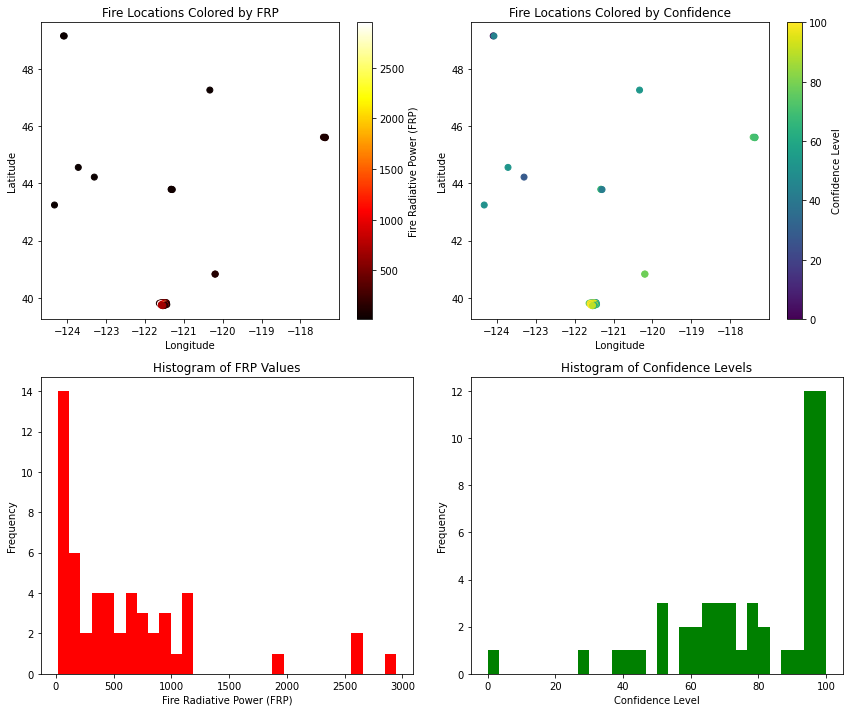

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC

# Open the HDF5 file
file = SD('MOD14.A2018312.1950.061.2021344091856.hdf', SDC.READ)

# Read relevant datasets
latitude = file.select('FP_latitude')[:]
longitude = file.select('FP_longitude')[:]
frp = file.select('FP_power')[:]  # Fire Radiative Power
confidence = file.select('FP_confidence')[:]  # Confidence level

# Plotting the data
plt.figure(figsize=(12, 10))

# Scatter plot of fire locations colored by FRP
plt.subplot(2, 2, 1)
plt.scatter(longitude, latitude, c=frp, cmap='hot', marker='o')
plt.colorbar(label='Fire Radiative Power (FRP)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Locations Colored by FRP')

# Scatter plot of fire locations colored by confidence
plt.subplot(2, 2, 2)
plt.scatter(longitude, latitude, c=confidence, cmap='viridis', marker='o')
plt.colorbar(label='Confidence Level')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Locations Colored by Confidence')

# Histogram of FRP values
plt.subplot(2, 2, 3)
plt.hist(frp, bins=30, color='red')
plt.xlabel('Fire Radiative Power (FRP)')
plt.ylabel('Frequency')
plt.title('Histogram of FRP Values')

# Histogram of confidence levels
plt.subplot(2, 2, 4)
plt.hist(confidence, bins=30, color='green')
plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.title('Histogram of Confidence Levels')

plt.tight_layout()
plt.show()


In [33]:
# Print unique values for FRP
unique_frp = np.unique(frp)
print("Unique FRP values:")
print(unique_frp)

# Print unique values for Confidence
unique_confidence = np.unique(confidence)
print("Unique Confidence values:")
print(unique_confidence)

Unique FRP values:
[  17.673374   19.503208   22.523102   27.449251   30.935259   35.864765
   41.33715    47.744495   60.081417   71.88807    85.88533    86.5471
   94.02927   101.431244  117.72214   118.31452   132.65257   149.19609
  151.51901   174.34921   225.30533   296.08765   324.10748   325.8158
  351.4247    371.63098   425.24713   442.2041    461.38907   491.3017
  574.7548    576.04395   616.5151    632.84686   653.1302    671.8993
  702.475     752.5529    757.1603    820.87555   866.366     911.9679
  932.34485   946.7112   1025.246    1103.601    1167.0106   1173.3677
 1175.5682   1919.4377   2575.13     2619.3596   2948.6772  ]
Unique Confidence values:
[  0  28  37  42  44  50  52  53  57  61  63  64  65  66  67  68  70  72
  73  76  78  79  80  87  90  94  96  97 100]


# VIIRS data


# VIIRS Fire Data Features

This notebook provides an overview of the key features found in VIIRS fire detection datasets, based on the VIIRS Active Fire User Guide. Each feature is described with its significance and possible values.
https://viirsland.gsfc.nasa.gov/PDF/VIIRS_activefire_User_Guide.pdf#page=8.92

## 1. Longitude and Latitude
- **Description**: Geographic coordinates indicating the position of each detected fire pixel.
- **Format**: Degrees (°)
- **Range**:
  - Longitude: -180° to +180°
  - Latitude: -90° to +90°
  
## 2. Time
- **Description**: The timestamp of when the VIIRS sensor detected the fire pixel.
- **Format**: UTC (Coordinated Universal Time)
- **Use**: It is used to mark the exact time of fire detection, crucial for temporal analysis of fire events.

## 3. Fire Mask (Fire/Land/Water/Burned Area/No Data)
- **Description**: The fire mask assigns categories to each pixel based on whether it detected fire, land, water, or other conditions.
- **Categories**:
  - `0`: Not processed (missing data)
  - `1`: Bowtie deletion (affected by scan geometry)
  - `2`: Sun glint (solar reflection)
  - `3`: Water
  - `4`: Cloud-covered pixels
  - `5`: Non-fire land pixel
  - `6`: Unclassified (insufficient information)
  - `7`: Low confidence fire pixel
  - `8`: Nominal confidence fire pixel
  - `9`: High confidence fire pixel

## 4. FP_power (Fire Radiative Power - FRP)
- **Description**: Fire Radiative Power (FRP) represents the amount of energy released by a fire, expressed in megawatts (MW). It provides a measure of fire intensity and can be used to estimate emissions.
- **Format**: 32-bit floating point (float32)
- **Range**: Typically ranges from >0 MW to around **5000 MW** for large fires.
- **Use**: FRP is a critical metric for evaluating fire energy output and understanding fire behavior, intensity, and emissions.

## 5. FP_confidence (Detection Confidence)
- **Description**: Each fire detection is assigned a confidence level ranging from 0 to 100, representing the likelihood that the pixel represents a true fire.
- **Format**: Unsigned 8-bit integer (uint8)
- **Range**: 
  - **0**: Lowest confidence
  - **100**: Highest confidence
- **Use**: Detection confidence helps users filter out false positives or be more lenient depending on their tolerance for missing true fires. Higher values indicate greater confidence in the detection.

## 6. Source
- **Description**: Indicates the satellite and sensor responsible for detecting the fire pixel.
- **Options**:
  - **Suomi-NPP (VNP)**
  - **NOAA-20**
- **Use**: The source provides information on which satellite was used to collect the data.

---

This guide provides an overview of the main features of VIIRS fire data as outlined in the VIIRS Active Fire User Guide. Each feature is critical for interpreting and analyzing fire detection data, with updates to both **FP_power** and **FP_confidence** to reflect accurate details on fire radiative power and detection confidence.


In [22]:
#read .nc file
import netCDF4 as nc
import numpy as np
import xarray as xr

file_path = 'VJ114.A2018312.2036.002.2022294181925.nc'
dataset = xr.open_dataset(file_path)
dataset 


<xarray.Dataset>
Dimensions:        (phony_dim_0: 12149, phony_dim_1: 8, phony_dim_2: 8042,
                    phony_dim_3: 269, phony_dim_4: 3216, phony_dim_5: 3200,
                    phony_dim_6: 16)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2,
                                phony_dim_3, phony_dim_4, phony_dim_5,
                                phony_dim_6
Data variables: (12/36)
    CMG_day        (phony_dim_0, phony_dim_1) uint16 ...
    CMG_night      (phony_dim_2, phony_dim_1) uint16 ...
    FP_AdjCloud    (phony_dim_3) uint8 ...
    FP_AdjWater    (phony_dim_3) uint8 ...
    FP_CMG_col     (phony_dim_3) int16 ...
    FP_CMG_row     (phony_dim_3) int16 ...
    ...             ...
    fire mask      (phony_dim_4, phony_dim_5) uint8 ...
    qhist07        (phony_dim_6) uint32 ...
    qhist11        (phony_dim_6) uint32 ...
    qhist13        (phony_dim_6) uint32 ...
    qhist15        (phony_dim_6) uint32 ...
    qhist16        (phony_dim_6) uint32 ...
Attributes: (12/81)
    FirePix:                           269
    LandFirePix:                       269
    WaterFirePix:                      0
    MissingPix:                        0
    LandPix:                           5940961
    WaterPix:                          3025247
    ...                                ...
    RangeBeginningDate:                2018-11-08
    PGE_EndTime:                       2018-11-08 20:42:00.000
    project:                           VIIRS Land SIPS Active Fire Project
    SensorShortname:                   VIIRS
    GRingPointSequenceNo:              [1 2 3 4]
    creator_name:                      VIIRS Land SIPS Processing Group

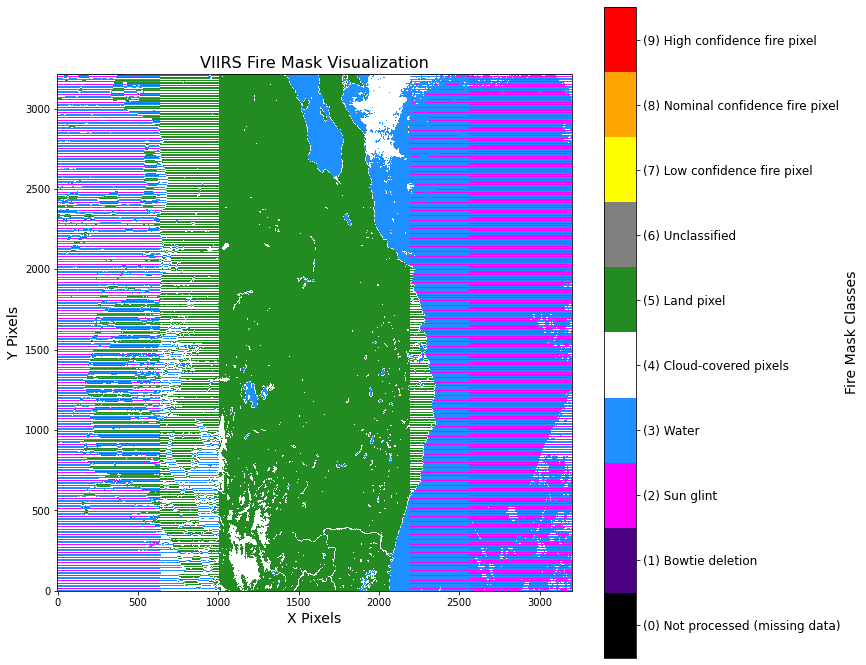

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import xarray as xr

# Define class names with numbers
class_names = {
    0: '(0) Not processed (missing data)',
    1: '(1) Bowtie deletion',
    2: '(2) Sun glint',
    3: '(3) Water',
    4: '(4) Cloud-covered pixels',
    5: '(5) Land pixel',
    6: '(6) Unclassified',
    7: '(7) Low confidence fire pixel',
    8: '(8) Nominal confidence fire pixel',
    9: '(9) High confidence fire pixel'
}

# Define distinct colors for each class
distinct_colors = [
    '#000000',  # Black for not processed (missing data)
    '#4B0082',  # Indigo for bowtie deletion
    '#FF00FF',  # Magenta for sun glint
    '#1E90FF',  # DodgerBlue for water
    '#FFFFFF',  # White for cloud-covered pixels
    '#228B22',  # ForestGreen for non-fire land pixel
    '#808080',  # Gray for unclassified
    '#FFFF00',  # Yellow for low confidence fire pixel
    '#FFA500',  # Orange for nominal confidence fire pixel
    '#FF0000'   # Red for high confidence fire pixel
]

# File path to the NetCDF file
file_path = 'VJ114.A2018312.2036.002.2022294181925.nc'

# Open the NetCDF file
dataset = xr.open_dataset(file_path)

# Extract the fire mask data and flip it vertically
fire_mask_data = np.flipud(dataset['fire mask'].values)

# Create a custom colormap
cmap = ListedColormap(distinct_colors)

# Create norm to map values to colors
bounds = np.arange(11) - 0.5
norm = BoundaryNorm(bounds, cmap.N)

# Increase figure size to accommodate larger legend
plt.figure(figsize=(12, 10))

# Plotting the Fire Mask Data
img = plt.imshow(fire_mask_data, cmap=cmap, norm=norm, origin='lower')

# Add colorbar with larger font size
cbar = plt.colorbar(img, label='Fire Mask Classes', ticks=range(10))
cbar.set_ticklabels([class_names[i] for i in range(10)])
cbar.ax.tick_params(labelsize=12)  # Increase label size
cbar.set_label('Fire Mask Classes', size=14)  # Increase colorbar title size

plt.title('VIIRS Fire Mask Visualization', fontsize=16)
plt.xlabel('X Pixels', fontsize=14)
plt.ylabel('Y Pixels', fontsize=14)

# Adjust layout to prevent cutting off colorbar labels
plt.tight_layout()

plt.show()

# Close the dataset
dataset.close()

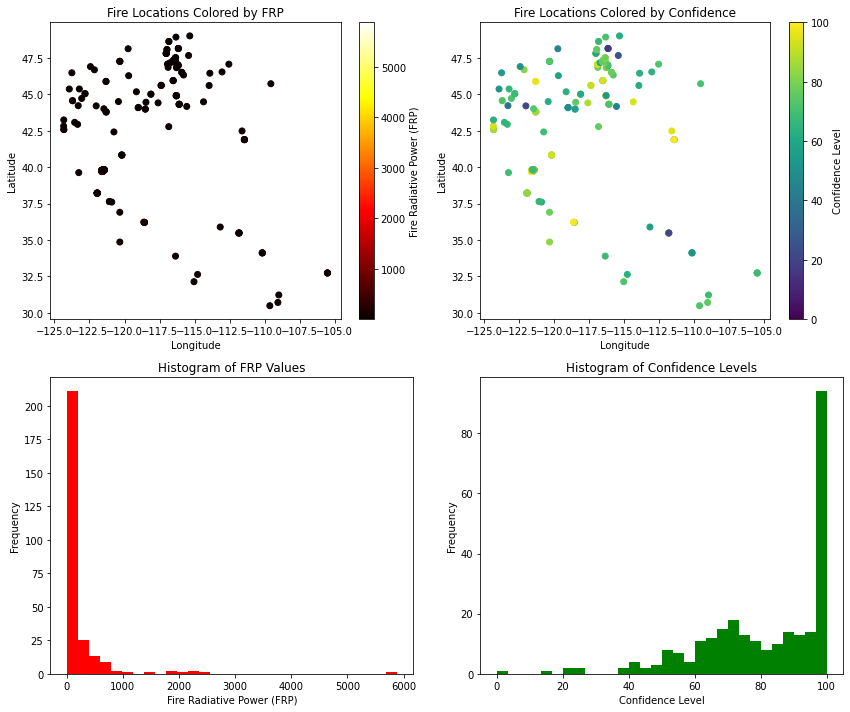

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Load the VIIRS data
file_path = 'VJ114.A2018312.2036.002.2022294181925.nc'
dataset = xr.open_dataset(file_path)

# Extract relevant data
latitude = dataset['FP_latitude'].values
longitude = dataset['FP_longitude'].values
frp = dataset['FP_power'].values  # Fire Radiative Power
confidence = dataset['FP_confidence'].values  # Confidence level

# Plotting the data
plt.figure(figsize=(12, 10))

# Scatter plot of fire locations colored by FRP
plt.subplot(2, 2, 1)
plt.scatter(longitude, latitude, c=frp, cmap='hot', marker='o')
plt.colorbar(label='Fire Radiative Power (FRP)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Locations Colored by FRP')

# Scatter plot of fire locations colored by confidence
plt.subplot(2, 2, 2)
plt.scatter(longitude, latitude, c=confidence, cmap='viridis', marker='o')
plt.colorbar(label='Confidence Level')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Locations Colored by Confidence')

# Histogram of FRP values
plt.subplot(2, 2, 3)
plt.hist(frp, bins=30, color='red')
plt.xlabel('Fire Radiative Power (FRP)')
plt.ylabel('Frequency')
plt.title('Histogram of FRP Values')

# Histogram of confidence levels
plt.subplot(2, 2, 4)
plt.hist(confidence, bins=30, color='green')
plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.title('Histogram of Confidence Levels')

plt.tight_layout()
plt.show()
